In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [2]:
#neural network class defiation
class neuralNetwork:
    #initialise the neural network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    #train the neural network
    def train(self,inputs_list,targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    #query the network
    def query(self,inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [11]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
#load the mnist training data file
training_data_file=open ("mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs=10
for e in range(epochs):
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\KEVIN ISAAC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-dd37e12b1112>", line 25, in <module>
    n.train(inputs, targets)
  File "<ipython-input-2-03915f2ec067>", line 34, in train
    final_inputs = numpy.dot(self.who, hidden_outputs)
  File "<__array_function__ internals>", line 5, in dot
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\KEVIN ISAAC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\KEVIN ISAAC\anaconda3\lib\site-packages\IPython\cor

TypeError: object of type 'NoneType' has no len()

In [4]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
all_values=test_data_list[2].split(',')
print(all_values[0])

1


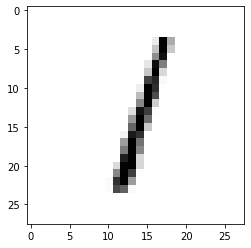

In [6]:
image_array= numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap="Greys", interpolation='None')

In [7]:
n.query((numpy.asfarray(all_values[1:])/255.0 *0.99)+ 0.01)

array([[0.00354696],
       [0.995411  ],
       [0.01998349],
       [0.00245437],
       [0.01323462],
       [0.00638091],
       [0.00474072],
       [0.01320063],
       [0.00197472],
       [0.0061222 ]])

In [8]:
scorecard=[]
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label," correct label")
    inputs=(numpy.asfarray(all_values[1:])/255.0 *0.99)+ 0.01
    outputs = n.query(inputs)
    label= numpy.argmax(outputs)
    print(label," Network works")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7  correct label
7  Network works
2  correct label
2  Network works
1  correct label
1  Network works
0  correct label
0  Network works
4  correct label
4  Network works
1  correct label
1  Network works
4  correct label
4  Network works
9  correct label
9  Network works
5  correct label
5  Network works
9  correct label
9  Network works
0  correct label
0  Network works
6  correct label
6  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct label
1  Network works
5  correct label
5  Network works
9  correct label
9  Network works
7  correct label
7  Network works
3  correct label
3  Network works
4  correct label
4  Network works
9  correct label
9  Network works
6  correct label
6  Network works
6  correct label
6  Network works
5  correct label
5  Network works
4  correct label
4  Network works
0  correct label
0  Network works
7  correct label
7  Network works
4  correct label
4  Network works
0  correct label
0  Network works
1  correct lab

0  Network works
0  correct label
0  Network works
2  correct label
2  Network works
8  correct label
8  Network works
4  correct label
4  Network works
7  correct label
7  Network works
1  correct label
1  Network works
2  correct label
2  Network works
4  correct label
4  Network works
0  correct label
0  Network works
2  correct label
2  Network works
7  correct label
7  Network works
4  correct label
4  Network works
3  correct label
3  Network works
3  correct label
3  Network works
0  correct label
0  Network works
0  correct label
0  Network works
3  correct label
3  Network works
1  correct label
1  Network works
9  correct label
9  Network works
6  correct label
6  Network works
5  correct label
5  Network works
2  correct label
2  Network works
5  correct label
5  Network works
9  correct label
9  Network works
2  correct label
7  Network works
9  correct label
9  Network works
3  correct label
3  Network works
0  correct label
0  Network works
4  correct label
4  Network wor

7  Network works
4  correct label
4  Network works
4  correct label
4  Network works
7  correct label
7  Network works
9  correct label
9  Network works
6  correct label
6  Network works
9  correct label
9  Network works
0  correct label
0  Network works
9  correct label
9  Network works
8  correct label
8  Network works
0  correct label
0  Network works
4  correct label
4  Network works
6  correct label
6  Network works
0  correct label
0  Network works
6  correct label
6  Network works
3  correct label
3  Network works
5  correct label
5  Network works
4  correct label
4  Network works
8  correct label
8  Network works
3  correct label
3  Network works
3  correct label
3  Network works
9  correct label
9  Network works
3  correct label
3  Network works
3  correct label
3  Network works
3  correct label
3  Network works
7  correct label
7  Network works
8  correct label
8  Network works
0  correct label
0  Network works
8  correct label
2  Network works
2  correct label
8  Network wor

1  Network works
4  correct label
4  Network works
2  correct label
2  Network works
4  correct label
4  Network works
2  correct label
2  Network works
1  correct label
1  Network works
7  correct label
7  Network works
9  correct label
9  Network works
6  correct label
6  Network works
1  correct label
1  Network works
1  correct label
1  Network works
2  correct label
2  Network works
4  correct label
4  Network works
8  correct label
8  Network works
1  correct label
1  Network works
7  correct label
7  Network works
7  correct label
7  Network works
4  correct label
4  Network works
8  correct label
7  Network works
0  correct label
0  Network works
7  correct label
7  Network works
3  correct label
3  Network works
1  correct label
1  Network works
3  correct label
3  Network works
1  correct label
1  Network works
0  correct label
0  Network works
7  correct label
7  Network works
7  correct label
7  Network works
0  correct label
0  Network works
3  correct label
3  Network wor

5  correct label
5  Network works
4  correct label
4  Network works
7  correct label
7  Network works
8  correct label
8  Network works
7  correct label
7  Network works
8  correct label
8  Network works
0  correct label
0  Network works
7  correct label
7  Network works
6  correct label
6  Network works
8  correct label
8  Network works
8  correct label
8  Network works
7  correct label
7  Network works
3  correct label
3  Network works
3  correct label
3  Network works
1  correct label
1  Network works
9  correct label
9  Network works
5  correct label
5  Network works
2  correct label
2  Network works
7  correct label
7  Network works
3  correct label
3  Network works
5  correct label
5  Network works
1  correct label
1  Network works
1  correct label
1  Network works
2  correct label
2  Network works
1  correct label
1  Network works
4  correct label
4  Network works
7  correct label
7  Network works
4  correct label
4  Network works
7  correct label
7  Network works
5  correct lab

8  Network works
0  correct label
0  Network works
4  correct label
4  Network works
1  correct label
1  Network works
5  correct label
3  Network works
8  correct label
3  Network works
2  correct label
2  Network works
9  correct label
9  Network works
1  correct label
1  Network works
8  correct label
8  Network works
0  correct label
0  Network works
6  correct label
6  Network works
7  correct label
7  Network works
2  correct label
2  Network works
1  correct label
1  Network works
0  correct label
0  Network works
5  correct label
5  Network works
5  correct label
5  Network works
2  correct label
2  Network works
0  correct label
0  Network works
2  correct label
2  Network works
2  correct label
2  Network works
0  correct label
0  Network works
2  correct label
2  Network works
4  correct label
4  Network works
9  correct label
9  Network works
8  correct label
8  Network works
0  correct label
0  Network works
9  correct label
9  Network works
9  correct label
9  Network wor

1  Network works
2  correct label
2  Network works
9  correct label
9  Network works
1  correct label
1  Network works
9  correct label
9  Network works
9  correct label
9  Network works
4  correct label
4  Network works
0  correct label
0  Network works
8  correct label
8  Network works
4  correct label
4  Network works
5  correct label
5  Network works
2  correct label
2  Network works
9  correct label
9  Network works
2  correct label
2  Network works
1  correct label
1  Network works
2  correct label
2  Network works
1  correct label
1  Network works
7  correct label
7  Network works
3  correct label
3  Network works
6  correct label
6  Network works
8  correct label
8  Network works
8  correct label
8  Network works
4  correct label
4  Network works
9  correct label
9  Network works
1  correct label
1  Network works
9  correct label
9  Network works
8  correct label
8  Network works
5  correct label
5  Network works
7  correct label
7  Network works
5  correct label
5  Network wor

0  Network works
8  correct label
8  Network works
1  correct label
1  Network works
9  correct label
4  Network works
5  correct label
5  Network works
7  correct label
7  Network works
9  correct label
9  Network works
6  correct label
6  Network works
9  correct label
9  Network works
0  correct label
0  Network works
6  correct label
6  Network works
1  correct label
1  Network works
5  correct label
5  Network works
5  correct label
5  Network works
8  correct label
8  Network works
3  correct label
3  Network works
8  correct label
8  Network works
2  correct label
2  Network works
6  correct label
6  Network works
5  correct label
5  Network works
0  correct label
0  Network works
7  correct label
7  Network works
4  correct label
4  Network works
6  correct label
6  Network works
1  correct label
1  Network works
3  correct label
3  Network works
4  correct label
4  Network works
7  correct label
7  Network works
3  correct label
3  Network works
2  correct label
2  Network wor

1  Network works
7  correct label
7  Network works
8  correct label
8  Network works
4  correct label
4  Network works
6  correct label
6  Network works
1  correct label
1  Network works
8  correct label
8  Network works
4  correct label
4  Network works
3  correct label
3  Network works
1  correct label
1  Network works
2  correct label
2  Network works
8  correct label
8  Network works
0  correct label
0  Network works
8  correct label
8  Network works
5  correct label
5  Network works
9  correct label
9  Network works
1  correct label
2  Network works
4  correct label
4  Network works
2  correct label
2  Network works
0  correct label
0  Network works
2  correct label
3  Network works
7  correct label
7  Network works
0  correct label
0  Network works
9  correct label
1  Network works
0  correct label
0  Network works
2  correct label
2  Network works
5  correct label
5  Network works
7  correct label
7  Network works
6  correct label
6  Network works
7  correct label
7  Network wor

9  correct label
9  Network works
2  correct label
2  Network works
4  correct label
4  Network works
3  correct label
3  Network works
7  correct label
7  Network works
9  correct label
9  Network works
1  correct label
1  Network works
5  correct label
5  Network works
2  correct label
2  Network works
4  correct label
4  Network works
9  correct label
9  Network works
0  correct label
0  Network works
3  correct label
3  Network works
8  correct label
8  Network works
5  correct label
5  Network works
3  correct label
3  Network works
6  correct label
5  Network works
0  correct label
0  Network works
9  correct label
9  Network works
4  correct label
4  Network works
6  correct label
6  Network works
2  correct label
2  Network works
5  correct label
5  Network works
0  correct label
0  Network works
2  correct label
0  Network works
7  correct label
7  Network works
4  correct label
4  Network works
6  correct label
6  Network works
6  correct label
6  Network works
8  correct lab

0  Network works
4  correct label
4  Network works
4  correct label
4  Network works
7  correct label
7  Network works
6  correct label
6  Network works
3  correct label
3  Network works
0  correct label
8  Network works
0  correct label
0  Network works
4  correct label
4  Network works
3  correct label
3  Network works
0  correct label
0  Network works
6  correct label
6  Network works
1  correct label
1  Network works
9  correct label
9  Network works
6  correct label
5  Network works
1  correct label
1  Network works
3  correct label
3  Network works
8  correct label
8  Network works
1  correct label
1  Network works
2  correct label
2  Network works
5  correct label
5  Network works
6  correct label
6  Network works
2  correct label
2  Network works
7  correct label
4  Network works
3  correct label
3  Network works
6  correct label
6  Network works
0  correct label
0  Network works
1  correct label
1  Network works
9  correct label
9  Network works
7  correct label
7  Network wor

8  Network works
1  correct label
1  Network works
2  correct label
2  Network works
9  correct label
1  Network works
9  correct label
9  Network works
5  correct label
5  Network works
9  correct label
9  Network works
7  correct label
7  Network works
3  correct label
3  Network works
7  correct label
7  Network works
8  correct label
8  Network works
0  correct label
0  Network works
1  correct label
1  Network works
3  correct label
3  Network works
0  correct label
0  Network works
4  correct label
4  Network works
6  correct label
6  Network works
1  correct label
1  Network works
0  correct label
0  Network works
2  correct label
2  Network works
5  correct label
5  Network works
8  correct label
8  Network works
4  correct label
4  Network works
4  correct label
4  Network works
1  correct label
1  Network works
1  correct label
1  Network works
5  correct label
5  Network works
4  correct label
4  Network works
6  correct label
8  Network works
6  correct label
6  Network wor

8  Network works
2  correct label
2  Network works
1  correct label
1  Network works
4  correct label
4  Network works
3  correct label
3  Network works
8  correct label
8  Network works
3  correct label
3  Network works
9  correct label
9  Network works
9  correct label
9  Network works
4  correct label
4  Network works
8  correct label
8  Network works
3  correct label
3  Network works
4  correct label
4  Network works
7  correct label
7  Network works
2  correct label
2  Network works
7  correct label
7  Network works
5  correct label
5  Network works
7  correct label
7  Network works
0  correct label
0  Network works
4  correct label
4  Network works
3  correct label
3  Network works
3  correct label
3  Network works
2  correct label
2  Network works
6  correct label
6  Network works
7  correct label
7  Network works
6  correct label
6  Network works
0  correct label
0  Network works
0  correct label
0  Network works
6  correct label
6  Network works
7  correct label
7  Network wor

6  Network works
8  correct label
8  Network works
5  correct label
5  Network works
6  correct label
6  Network works
5  correct label
3  Network works
8  correct label
5  Network works
6  correct label
6  Network works
4  correct label
4  Network works
1  correct label
1  Network works
8  correct label
8  Network works
6  correct label
6  Network works
5  correct label
5  Network works
2  correct label
2  Network works
8  correct label
5  Network works
4  correct label
4  Network works
5  correct label
5  Network works
5  correct label
5  Network works
4  correct label
4  Network works
7  correct label
7  Network works
7  correct label
7  Network works
0  correct label
0  Network works
7  correct label
7  Network works
8  correct label
8  Network works
2  correct label
2  Network works
2  correct label
2  Network works
3  correct label
3  Network works
7  correct label
1  Network works
0  correct label
0  Network works
1  correct label
1  Network works
8  correct label
8  Network wor

1  Network works
2  correct label
2  Network works
8  correct label
8  Network works
6  correct label
6  Network works
0  correct label
0  Network works
7  correct label
3  Network works
0  correct label
0  Network works
9  correct label
9  Network works
1  correct label
1  Network works
1  correct label
1  Network works
6  correct label
0  Network works
7  correct label
7  Network works
5  correct label
5  Network works
9  correct label
9  Network works
9  correct label
9  Network works
1  correct label
1  Network works
9  correct label
9  Network works
5  correct label
5  Network works
9  correct label
9  Network works
2  correct label
2  Network works
5  correct label
5  Network works
0  correct label
0  Network works
4  correct label
4  Network works
1  correct label
1  Network works
0  correct label
0  Network works
8  correct label
8  Network works
9  correct label
9  Network works
0  correct label
0  Network works
8  correct label
8  Network works
9  correct label
9  Network wor

8  correct label
8  Network works
9  correct label
4  Network works
5  correct label
5  Network works
9  correct label
9  Network works
8  correct label
8  Network works
3  correct label
3  Network works
2  correct label
2  Network works
7  correct label
7  Network works
2  correct label
2  Network works
9  correct label
9  Network works
7  correct label
7  Network works
2  correct label
2  Network works
1  correct label
1  Network works
1  correct label
1  Network works
3  correct label
3  Network works
7  correct label
7  Network works
5  correct label
5  Network works
3  correct label
3  Network works
1  correct label
1  Network works
9  correct label
9  Network works
8  correct label
8  Network works
2  correct label
2  Network works
2  correct label
2  Network works
2  correct label
2  Network works
8  correct label
8  Network works
8  correct label
8  Network works
5  correct label
5  Network works
7  correct label
7  Network works
3  correct label
3  Network works
8  correct lab

4  Network works
5  correct label
6  Network works
8  correct label
8  Network works
8  correct label
8  Network works
4  correct label
4  Network works
5  correct label
5  Network works
4  correct label
4  Network works
8  correct label
8  Network works
5  correct label
5  Network works
4  correct label
9  Network works
9  correct label
9  Network works
2  correct label
2  Network works
2  correct label
2  Network works
1  correct label
1  Network works
2  correct label
2  Network works
6  correct label
6  Network works
8  correct label
8  Network works
8  correct label
8  Network works
7  correct label
7  Network works
0  correct label
0  Network works
3  correct label
3  Network works
6  correct label
6  Network works
6  correct label
6  Network works
4  correct label
4  Network works
3  correct label
3  Network works
8  correct label
8  Network works
8  correct label
8  Network works
7  correct label
7  Network works
2  correct label
2  Network works
2  correct label
2  Network wor

8  Network works
3  correct label
3  Network works
0  correct label
0  Network works
2  correct label
2  Network works
9  correct label
9  Network works
8  correct label
8  Network works
3  correct label
3  Network works
2  correct label
2  Network works
5  correct label
5  Network works
3  correct label
3  Network works
8  correct label
9  Network works
8  correct label
8  Network works
0  correct label
0  Network works
0  correct label
0  Network works
1  correct label
1  Network works
9  correct label
9  Network works
5  correct label
5  Network works
1  correct label
1  Network works
3  correct label
3  Network works
9  correct label
9  Network works
6  correct label
6  Network works
0  correct label
0  Network works
1  correct label
1  Network works
4  correct label
4  Network works
1  correct label
1  Network works
7  correct label
7  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
7  correct label
7  Network wor

1  Network works
1  correct label
1  Network works
5  correct label
5  Network works
6  correct label
6  Network works
0  correct label
0  Network works
7  correct label
7  Network works
0  correct label
0  Network works
7  correct label
7  Network works
2  correct label
2  Network works
3  correct label
3  Network works
2  correct label
2  Network works
5  correct label
5  Network works
2  correct label
2  Network works
2  correct label
2  Network works
9  correct label
9  Network works
4  correct label
4  Network works
9  correct label
9  Network works
8  correct label
8  Network works
1  correct label
1  Network works
2  correct label
3  Network works
1  correct label
1  Network works
6  correct label
6  Network works
1  correct label
1  Network works
2  correct label
2  Network works
7  correct label
7  Network works
8  correct label
4  Network works
0  correct label
0  Network works
0  correct label
0  Network works
0  correct label
0  Network works
8  correct label
8  Network wor

4  Network works
1  correct label
1  Network works
8  correct label
8  Network works
7  correct label
7  Network works
5  correct label
5  Network works
5  correct label
5  Network works
1  correct label
1  Network works
8  correct label
8  Network works
9  correct label
9  Network works
1  correct label
1  Network works
3  correct label
3  Network works
6  correct label
6  Network works
3  correct label
3  Network works
3  correct label
3  Network works
2  correct label
2  Network works
2  correct label
2  Network works
6  correct label
6  Network works
9  correct label
9  Network works
9  correct label
9  Network works
6  correct label
6  Network works
5  correct label
5  Network works
5  correct label
5  Network works
3  correct label
3  Network works
3  correct label
3  Network works
8  correct label
8  Network works
1  correct label
1  Network works
6  correct label
6  Network works
5  correct label
5  Network works
6  correct label
6  Network works
8  correct label
8  Network wor

9  Network works
3  correct label
3  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
8  correct label
8  Network works
9  correct label
9  Network works
1  correct label
1  Network works
4  correct label
4  Network works
0  correct label
0  Network works
9  correct label
9  Network works
5  correct label
5  Network works
0  correct label
0  Network works
8  correct label
8  Network works
0  correct label
0  Network works
7  correct label
7  Network wor

2  Network works
1  correct label
1  Network works
9  correct label
9  Network works
6  correct label
6  Network works
7  correct label
7  Network works
9  correct label
9  Network works
0  correct label
0  Network works
4  correct label
4  Network works
6  correct label
6  Network works
1  correct label
1  Network works
7  correct label
7  Network works
3  correct label
3  Network works
8  correct label
8  Network works
7  correct label
7  Network works
2  correct label
2  Network works
9  correct label
9  Network works
6  correct label
6  Network works
5  correct label
5  Network works
8  correct label
8  Network works
3  correct label
3  Network works
9  correct label
9  Network works
0  correct label
0  Network works
5  correct label
5  Network works
7  correct label
7  Network works
1  correct label
1  Network works
6  correct label
6  Network works
1  correct label
1  Network works
0  correct label
0  Network works
9  correct label
9  Network works
3  correct label
3  Network wor

0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
1  correct label
1  Network works
2  correct label
2  Network works
6  correct label
6  Network works
5  correct label
5  Network works
3  correct label
3  Network works
0  correct label
0  Network works
7  correct label
7  Network works
0  correct label
0  Network works
4  correct label
4  Network works
1  correct label
1  Network works
4  correct label
4  Network works
3  correct label
3  Network works
6  correct label
6  Network works
7  correct label
7  Network works
2  correct label
2  Network works
3  correct label
3  Network works
1  correct label
1  Network works
2  correct label
2  Network works
1  correct label
1  Network works
2  correct lab

8  Network works
3  correct label
3  Network works
6  correct label
6  Network works
0  correct label
0  Network works
2  correct label
2  Network works
7  correct label
7  Network works
6  correct label
6  Network works
6  correct label
6  Network works
1  correct label
1  Network works
2  correct label
2  Network works
8  correct label
8  Network works
8  correct label
8  Network works
7  correct label
7  Network works
7  correct label
7  Network works
4  correct label
4  Network works
7  correct label
7  Network works
7  correct label
7  Network works
3  correct label
3  Network works
7  correct label
7  Network works
4  correct label
4  Network works
5  correct label
5  Network works
4  correct label
4  Network works
3  correct label
3  Network works
3  correct label
3  Network works
8  correct label
8  Network works
4  correct label
4  Network works
1  correct label
1  Network works
1  correct label
1  Network works
9  correct label
9  Network works
7  correct label
7  Network wor

2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
0  correct label
5  Network works
1  correct label
1  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
9  correct label
9  Network works
8  correct label
8  Network works
9  correct label
9  Network works
8  correct label
8  Network works
4  correct label
4  Network works
1  correct label
1  Network works
7  correct label
7  Network works
7  correct label
7  Network works
3  correct label
3  Network works
3  correct label
3  Network works
7  correct label
7  Network works
6  correct label
6  Network works
6  correct label
6  Network works
6  correct label
6  Network works
1  correct label
1  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct label
1  Network works
7  correct lab

9  Network works
8  correct label
8  Network works
9  correct label
9  Network works
2  correct label
2  Network works
3  correct label
3  Network works
5  correct label
5  Network works
5  correct label
5  Network works
9  correct label
9  Network works
4  correct label
4  Network works
2  correct label
2  Network works
1  correct label
1  Network works
9  correct label
9  Network works
4  correct label
4  Network works
9  correct label
9  Network works
1  correct label
1  Network works
3  correct label
3  Network works
9  correct label
9  Network works
2  correct label
2  Network works
0  correct label
0  Network works
6  correct label
6  Network works
0  correct label
0  Network works
4  correct label
4  Network works
0  correct label
0  Network works
6  correct label
4  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network wor

9  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
8  correct label
8  Network works
4  correct label
4  Network works
0  correct label
0  Network works
0  correct label
0  Network works
7  correct label
7  Network works
2  correct label
2  Network works
4  correct label
4  Network works
3  correct label
3  Network works
8  correct label
8  Network works
6  correct label
6  Network works
6  correct label
6  Network works
3  correct label
3  Network wor

3  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
0  correct label
0  Network works
6  correct label
6  Network works
1  correct label
1  Network works
6  correct label
6  Network works
8  correct label
8  Network works
7  correct label
7  Network works
0  correct label
0  Network works
1  correct label
1  Network works
5  correct label
5  Network works
0  correct label
0  Network works
8  correct label
8  Network works
5  correct label
6  Network works
0  correct label
0  Network works
1  correct label
1  Network works
5  correct label
5  Network works
8  correct label
8  Network works
4  correct label
4  Network works
2  correct label
2  Network works
3  correct label
3  Network works
9  correct label
9  Network works
7  correct label
7  Network works
6  correct label
6  Network works
9  correct label
9  Network works
1  correct label
1  Network works
9  correct label
9  Network works
0  correct label
0  Network wor

0  Network works
0  correct label
0  Network works
4  correct label
4  Network works
6  correct label
6  Network works
0  correct label
0  Network works
9  correct label
9  Network works
1  correct label
1  Network works
6  correct label
6  Network works
2  correct label
2  Network works
7  correct label
7  Network works
6  correct label
6  Network works
8  correct label
8  Network works
3  correct label
3  Network works
5  correct label
5  Network works
2  correct label
2  Network works
1  correct label
1  Network works
8  correct label
8  Network works
3  correct label
3  Network works
8  correct label
8  Network works
6  correct label
6  Network works
1  correct label
1  Network works
0  correct label
0  Network works
2  correct label
2  Network works
1  correct label
1  Network works
4  correct label
4  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network wor

3  correct label
3  Network works
4  correct label
4  Network works
7  correct label
7  Network works
2  correct label
2  Network works
0  correct label
0  Network works
5  correct label
5  Network works
0  correct label
0  Network works
1  correct label
8  Network works
9  correct label
9  Network works
2  correct label
2  Network works
3  correct label
3  Network works
2  correct label
2  Network works
3  correct label
3  Network works
5  correct label
5  Network works
5  correct label
5  Network works
7  correct label
7  Network works
8  correct label
8  Network works
4  correct label
4  Network works
9  correct label
9  Network works
9  correct label
9  Network works
7  correct label
7  Network works
1  correct label
1  Network works
1  correct label
1  Network works
9  correct label
9  Network works
0  correct label
0  Network works
7  correct label
7  Network works
8  correct label
8  Network works
3  correct label
3  Network works
4  correct label
4  Network works
8  correct lab

3  correct label
3  Network works
3  correct label
3  Network works
0  correct label
0  Network works
9  correct label
9  Network works
5  correct label
5  Network works
4  correct label
4  Network works
3  correct label
5  Network works
0  correct label
0  Network works
8  correct label
8  Network works
4  correct label
4  Network works
6  correct label
6  Network works
7  correct label
7  Network works
0  correct label
0  Network works
7  correct label
7  Network works
7  correct label
7  Network works
1  correct label
1  Network works
6  correct label
6  Network works
9  correct label
9  Network works
1  correct label
1  Network works
3  correct label
3  Network works
6  correct label
6  Network works
2  correct label
2  Network works
3  correct label
3  Network works
8  correct label
8  Network works
2  correct label
2  Network works
3  correct label
3  Network works
8  correct label
8  Network works
9  correct label
9  Network works
5  correct label
5  Network works
8  correct lab

6  Network works
3  correct label
3  Network works
7  correct label
7  Network works
4  correct label
4  Network works
2  correct label
2  Network works
8  correct label
8  Network works
9  correct label
9  Network works
8  correct label
8  Network works
7  correct label
7  Network works
1  correct label
1  Network works
4  correct label
9  Network works
0  correct label
0  Network works
4  correct label
4  Network works
8  correct label
8  Network works
5  correct label
5  Network works
2  correct label
2  Network works
3  correct label
3  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct label
1  Network works
9  correct label
9  Network works
1  correct label
1  Network works
5  correct label
5  Network works
1  correct label
1  Network works
7  correct label
7  Network works
6  correct label
6  Network works
1  correct label
1  Network works
2  correct label
2  Network works
1  correct label
1  Network works
6  correct label
6  Network wor

6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
6  correct label
6  Network works
4  correct label
4  Network works
2  correct label
2  Network works
6  correct label
6  Network works
4  correct label
4  Network works
7  correct label
7  Network works
5  correct label
5  Network works
5  correct label
5  Network works
4  correct label
4  Network works
7  correct label
7  Network works
2  correct label
2  Network works
9  correct label
9  Network works
3  correct label
3  Network works
9  correct label
9  Network works
3  correct label
3  Network works
8  correct label
8  Network works
2  correct label
2  Network works
0  correct label
0  Network works
9  correct label
9  Network works
5  correct label
5  Network works
6  correct label
6  Network works
0  correct label
0  Network works
1  correct label
1  Network works
0  correct label
0  Network works
6  correct label
6  Network works
5  correct label
5  Network wor

5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
1  correct label
1  Network works
6  correct label
6  Network works
8  correct label
8  Network works
9  correct label
9  Network works
9  correct label
9  Network wor

2  correct label
2  Network works
5  correct label
5  Network works
6  correct label
6  Network works
9  correct label
9  Network works
3  correct label
3  Network works
6  correct label
6  Network works
3  correct label
3  Network works
6  correct label
6  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
4  correct label
4  Network works
5  correct label
5  Network works
6  correct label
6  Network works
7  correct label
7  Network works
8  correct label
8  Network works
9  correct label
9  Network works
0  correct label
0  Network works
1  correct lab

8  Network works
0  correct label
0  Network works
6  correct label
6  Network works
0  correct label
0  Network works
0  correct label
1  Network works
2  correct label
2  Network works
3  correct label
3  Network works
7  correct label
7  Network works
9  correct label
9  Network works
4  correct label
4  Network works
7  correct label
7  Network works
1  correct label
1  Network works
9  correct label
9  Network works
1  correct label
1  Network works
7  correct label
7  Network works
1  correct label
1  Network works
4  correct label
4  Network works
0  correct label
0  Network works
0  correct label
0  Network works
1  correct label
1  Network works
7  correct label
7  Network works
5  correct label
5  Network works
7  correct label
7  Network works
1  correct label
1  Network works
3  correct label
3  Network works
3  correct label
3  Network works
3  correct label
3  Network works
1  correct label
1  Network works
6  correct label
6  Network works
9  correct label
9  Network wor

6  Network works
1  correct label
1  Network works
0  correct label
0  Network works
0  correct label
0  Network works
6  correct label
6  Network works
2  correct label
2  Network works
1  correct label
1  Network works
1  correct label
1  Network works
7  correct label
7  Network works
7  correct label
7  Network works
8  correct label
8  Network works
4  correct label
4  Network works
6  correct label
6  Network works
0  correct label
0  Network works
7  correct label
7  Network works
0  correct label
0  Network works
3  correct label
3  Network works
6  correct label
6  Network works
8  correct label
8  Network works
7  correct label
7  Network works
1  correct label
1  Network works
5  correct label
5  Network works
2  correct label
2  Network works
4  correct label
4  Network works
9  correct label
9  Network works
4  correct label
4  Network works
3  correct label
3  Network works
6  correct label
6  Network works
4  correct label
4  Network works
1  correct label
1  Network wor

In [9]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
scorecard_array=numpy.asarray(scorecard)
print("performance =",scorecard_array.sum()/scorecard_array.size)

performance = 0.9664
